# Pre-Processing

## Gather Data

In [143]:
# Importing necessary libraries
import pandas as pd # To work with datasets
import numpy as np # Used to perform mathematical and logical operations on multidimensional arrays
import matplotlib.pyplot as plt # Used for plotting graphs to gain insights in the data
import seaborn as sns # Used to visualize patterns
import warnings
warnings.filterwarnings("ignore")

In [144]:
# Loading the dataset we will use to decide the "winning model"
df = pd.read_parquet('sample_for_ml')
df

,index,imo_number,Design,event_time,app_wave_dir,app_swell_dir,vhm0,vhm0_sw1,app_wind_dir,wind_speed_kts,load,combined_cons,position,position_type,time,lat,lon,speed_over_ground,windbf,winddir
0,0,9626900,Dolphin 64,2020-02-27 18:00:00,5.0,5.0,2.829583,1.733333,NaN,NaN,1,26.00,24° 53' N / 088° 05' W,Noon At Sea,24.0,24.883333,-88.083333,8.70,7.0,N
1,1,9626900,Dolphin 64,2020-02-28 18:00:00,5.0,5.0,1.891633,1.559700,NaN,NaN,1,26.00,23° 48' N / 082° 59' W,Noon At Sea,24.0,23.800000,-82.983333,11.98,5.0,NNW
2,2,9626900,Dolphin 64,2020-02-29 17:00:00,7.0,6.0,1.166750,0.716500,NaN,NaN,1,24.92,26° 13' N / 079° 18' W,Noon At Sea,23.0,26.216667,-79.300000,12.70,7.0,NW
3,3,9626900,Dolphin 64,2020-03-01 17:00:00,6.0,6.0,1.833333,1.213333,NaN,NaN,1,26.00,26° 38' N / 074° 29' W,Noon At Sea,24.0,26.633333,-74.483333,11.62,6.0,NNE
4,4,9626900,Dolphin 64,2020-03-02 17:00:00,6.0,6.0,2.519125,2.295292,NaN,NaN,1,26.00,28° 16' N / 069° 51' W,Noon At Sea,24.0,28.266667,-69.850000,11.12,6.0,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,7000,9798337,Dolphin 38 Green,2020-01-13 16:00:00,5.0,5.0,2.808417,2.452750,NaN,NaN,1,18.55,27° 58' N / 062° 52' W,Noon At Sea,25.0,27.966667,-62.866667,11.44,6.0,SE
6586,7001,9798337,Dolphin 38 Green,2020-01-14 16:00:00,5.0,5.0,2.365556,2.284815,NaN,NaN,1,18.47,27° 09' N / 068° 04' W,Noon At Sea,24.0,27.150000,-68.066667,11.75,5.0,ENE
6587,7002,9798337,Dolphin 38 Green,2020-01-15 17:00:00,5.0,5.0,2.219470,2.172803,NaN,NaN,1,18.76,26° 18' N / 073° 33' W,Noon At Sea,25.0,26.300000,-73.550000,12.00,4.0,E
6588,7003,9798337,Dolphin 38 Green,2020-01-16 17:00:00,5.0,5.0,1.553167,1.516667,NaN,NaN,1,18.44,26° 09' N / 078° 40' W,Noon At Sea,24.0,26.150000,-78.666667,11.83,4.0,N


In [145]:

# Looking for missing values where 1 == True, 0 == False
print(df.isnull().sum())

index                   0
imo_number              0
Design                  0
event_time              0
app_wave_dir          153
app_swell_dir         131
vhm0                    0
vhm0_sw1                0
app_wind_dir         1836
wind_speed_kts       1715
load                    0
combined_cons           0
position                0
position_type           0
time                    0
lat                     0
lon                     0
speed_over_ground       0
windbf                275
winddir               256
dtype: int64


In [146]:
#df['year'] = df['event_time'].dt.year
#df

In [147]:
# Selecting only the variables we need in our dataset for the machine learning models
df = df[["Design", "app_wave_dir", "app_swell_dir", "vhm0", "vhm0_sw1", "app_wind_dir", "wind_speed_kts",  "speed_over_ground", "load", "combined_cons"]]

From the dataset, we can see that we do not need all the variables as many of them are irrelevant for the choice of machine learning model. Variables like "imo_number", "event_time", "position", "position_type", "time", "lat", and "lon" are not necessary in our model as it cannot be used as explanatory variables for our model. Furthermore, "windbf" is not in our model as it is equivalent to "wind_speed_kts" and "winddir" is not considered as it is equivalent to "app_wind_dir".

In [148]:
#df = df[df.year != 2020]
#df

Decides to keep all observations and fill in NaN as we want sufficiently large dataset and there might be important information that can get lost if we remove all rows after 2019.

# Handling categorical variables

In [149]:
# Make binary variables for the columns "Design" and "load" in which 1 == Dolphin 64 ship and 0 == Dolphin 38 Green and 1 == laden and 0 == ballast
design_bin = pd.get_dummies(df["Design"])
df = pd.concat((design_bin, df), axis = 1)
df = df.drop(["Design"], axis = 1)
df = df.drop(["Dolphin 38 Green"], axis = 1)
df = df.rename(columns = {"Dolphin 64": "design"})
df

,design,app_wave_dir,app_swell_dir,vhm0,vhm0_sw1,app_wind_dir,wind_speed_kts,speed_over_ground,load,combined_cons
0,1,5.0,5.0,2.829583,1.733333,NaN,NaN,8.70,1,26.00
1,1,5.0,5.0,1.891633,1.559700,NaN,NaN,11.98,1,26.00
2,1,7.0,6.0,1.166750,0.716500,NaN,NaN,12.70,1,24.92
3,1,6.0,6.0,1.833333,1.213333,NaN,NaN,11.62,1,26.00
4,1,6.0,6.0,2.519125,2.295292,NaN,NaN,11.12,1,26.00
...,...,...,...,...,...,...,...,...,...,...
6585,0,5.0,5.0,2.808417,2.452750,NaN,NaN,11.44,1,18.55
6586,0,5.0,5.0,2.365556,2.284815,NaN,NaN,11.75,1,18.47
6587,0,5.0,5.0,2.219470,2.172803,NaN,NaN,12.00,1,18.76
6588,0,5.0,5.0,1.553167,1.516667,NaN,NaN,11.83,1,18.44


When making dummy variables like this, we have to make sure to drop one of the features as the information will not be doubled (perfect multicollinearity)

## Dealing with missing values

In [150]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df

,design,app_wave_dir,app_swell_dir,vhm0,vhm0_sw1,app_wind_dir,wind_speed_kts,speed_over_ground,load,combined_cons
0,1.0,5.0,5.0,2.829583,1.733333,5.4,18.129864,8.70,1.0,26.00
1,1.0,5.0,5.0,1.891633,1.559700,6.0,11.519384,11.98,1.0,26.00
2,1.0,7.0,6.0,1.166750,0.716500,5.8,10.346632,12.70,1.0,24.92
3,1.0,6.0,6.0,1.833333,1.213333,5.4,14.067513,11.62,1.0,26.00
4,1.0,6.0,6.0,2.519125,2.295292,5.2,13.792033,11.12,1.0,26.00
...,...,...,...,...,...,...,...,...,...,...
6585,0.0,5.0,5.0,2.808417,2.452750,4.2,12.969203,11.44,1.0,18.55
6586,0.0,5.0,5.0,2.365556,2.284815,4.0,12.734473,11.75,1.0,18.47
6587,0.0,5.0,5.0,2.219470,2.172803,4.4,15.530505,12.00,1.0,18.76
6588,0.0,5.0,5.0,1.553167,1.516667,4.0,11.347595,11.83,1.0,18.44


There are different ways to handle missing data. Some methods include removing entire rows with missing values, or replace them with mean, median or mode. However, such method can discard valuable information or reduce the variability of the dataset. Therefore, we will be using the KNN imputer as this method better preserves the value and variability, as well as it is more precise and efficient compared to other methods.

In [151]:
df.describe()

,design,app_wave_dir,app_swell_dir,vhm0,vhm0_sw1,app_wind_dir,wind_speed_kts,speed_over_ground,load,combined_cons
count,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000,6590.000000
mean,0.722458,4.252716,4.294021,1.939599,1.414932,4.379605,12.517591,11.477772,0.841275,22.657919
std,0.447820,1.796905,1.757355,0.982860,0.799878,1.538201,4.932309,1.560970,0.365447,7.145791
min,0.000000,1.000000,1.000000,0.050267,0.040717,1.000000,1.149576,1.830000,0.000000,0.100000
25%,0.000000,3.000000,3.000000,1.277176,0.863917,3.000000,9.038296,10.670000,1.000000,19.100000
50%,1.000000,4.000000,4.000000,1.813793,1.281139,4.200000,12.119230,11.690000,1.000000,22.300000
75%,1.000000,6.000000,6.000000,2.489500,1.815625,5.200000,15.456202,12.537500,1.000000,26.640000
max,1.000000,8.000000,8.000000,9.758312,6.172000,8.000000,36.343141,15.790000,1.000000,243.100000


# Exploring the dataset

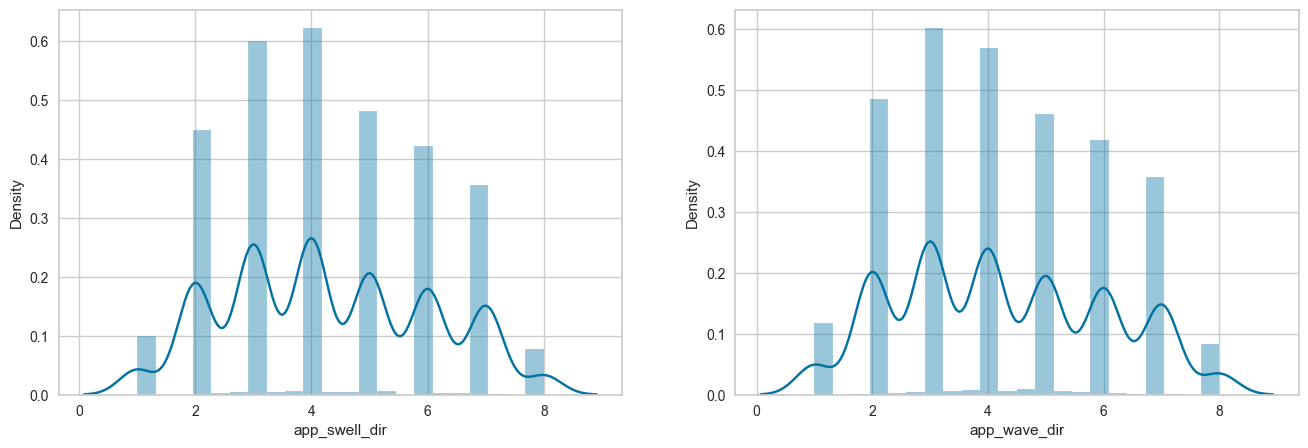

In [152]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['app_swell_dir'])
plt.subplot(1,2,2)
sns.distplot(df['app_wave_dir'])
plt.show()

<AxesSubplot: xlabel='app_wind_dir', ylabel='Density'>

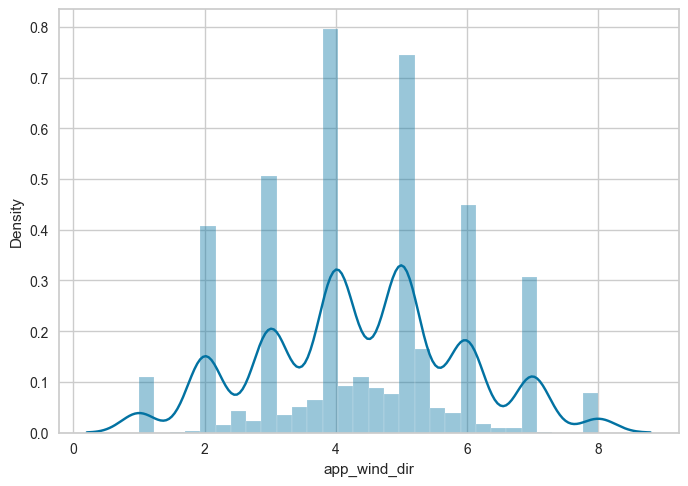

In [153]:
sns.distplot(df['app_wind_dir'])

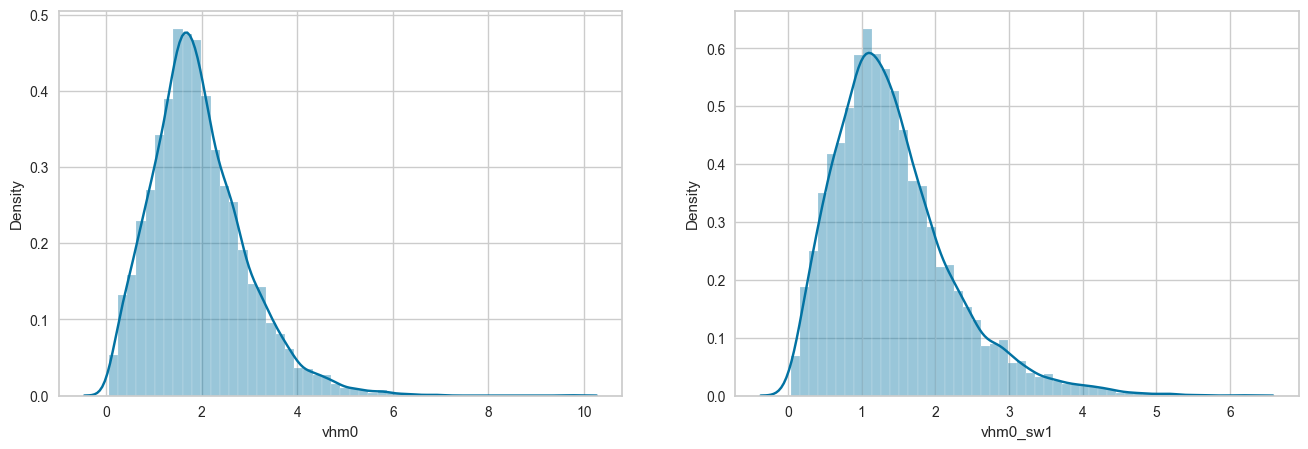

In [154]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['vhm0'])
plt.subplot(1,2,2)
sns.distplot(df['vhm0_sw1'])
plt.show()

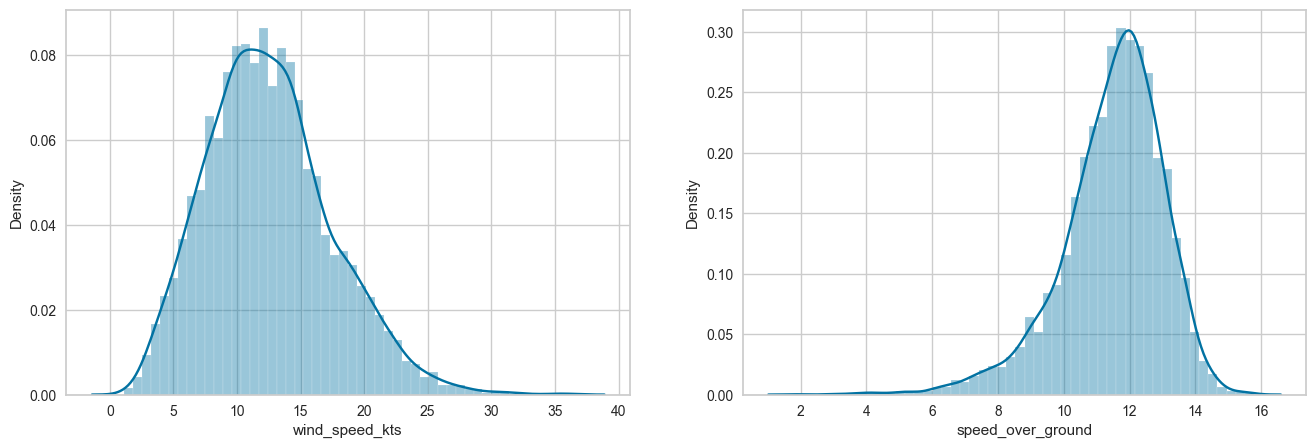

In [155]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['wind_speed_kts'])
plt.subplot(1,2,2)
sns.distplot(df['speed_over_ground'])
plt.show()

## Dealing with ordinal representation of data -> converting it nominal

In [156]:
# Round the numbers to closest integer
df = df.round({"app_swell_dir":0, "app_wave_dir":0, "app_wind_dir":0})

In [157]:
# Use One-Hot Encoding method to retrieve nominal dummies
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['app_wind_dir', 'app_swell_dir', 'app_wave_dir']
encoded_array = enc.fit_transform(df.loc[:,columns_to_one_hot])
df_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
df = pd.concat([df,df_encoded],axis=1)
df.drop(labels= columns_to_one_hot,axis=1,inplace=True)
df

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
0,1.0,2.829583,1.733333,18.129864,8.70,1.0,26.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.891633,1.559700,11.519384,11.98,1.0,26.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.166750,0.716500,10.346632,12.70,1.0,24.92,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.833333,1.213333,14.067513,11.62,1.0,26.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,2.519125,2.295292,13.792033,11.12,1.0,26.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,0.0,2.808417,2.452750,12.969203,11.44,1.0,18.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6586,0.0,2.365556,2.284815,12.734473,11.75,1.0,18.47,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6587,0.0,2.219470,2.172803,15.530505,12.00,1.0,18.76,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6588,0.0,1.553167,1.516667,11.347595,11.83,1.0,18.44,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Detecting and treating outliers

### VHM0

In [158]:
print("Highest allowed",df['vhm0'].mean() + 3*df['vhm0'].std())
print("Lowest allowed",df['vhm0'].mean() - 3*df['vhm0'].std())

Highest allowed 4.888179758260136
Lowest allowed -1.0089817169077986


In [159]:
df[(df['vhm0'] > 4.88) | (df['vhm0'] < -1.01)]

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
171,1.0,5.234074,2.470926,31.023312,10.96,1.0,20.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
172,1.0,5.387350,4.093050,25.354997,11.00,1.0,19.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
175,1.0,4.953333,0.948333,34.438661,3.88,1.0,20.90,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
424,1.0,6.946000,3.251500,32.841413,5.67,0.0,21.09,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
425,1.0,9.758312,4.204812,35.447020,10.74,0.0,20.86,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,0.0,5.790000,4.880278,21.259874,12.83,1.0,23.05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5479,0.0,5.213611,5.053333,17.761606,12.29,1.0,23.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6100,1.0,5.688333,3.497778,18.609574,6.29,0.0,26.88,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6106,1.0,5.723125,5.145833,22.449380,6.08,0.0,22.60,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
df = df[(df['vhm0'] < 4.88) & (df['vhm0'] > -1.01)]

In [161]:
upper_limit_vh = df['vhm0'].mean() + 3*df['vhm0'].std()
lower_limit_vh = df['vhm0'].mean() - 3*df['vhm0'].std()

In [162]:
df['vhm0'] = np.where(
    df['vhm0']>upper_limit_vh,
    upper_limit_vh,
    np.where(
        df['vhm0']<lower_limit_vh,
        lower_limit_vh,
        df['vhm0']
    )
)

### VHM0_SW1

In [163]:
print("Highest allowed",df['vhm0_sw1'].mean() + 3*df['vhm0_sw1'].std())
print("Lowest allowed",df['vhm0_sw1'].mean() - 3*df['vhm0_sw1'].std())

Highest allowed 3.6608128642532627
Lowest allowed -0.8807959963840251


In [164]:
df[(df['vhm0_sw1'] > 3.66) | (df['vhm0_sw1'] < -0.88)]

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
46,1.0,4.116500,4.049000,13.173642,7.40,1.0,30.40,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,1.0,4.084259,3.986852,14.355228,11.12,0.0,29.70,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86,1.0,4.646779,4.535152,13.095896,11.44,1.0,30.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
423,1.0,4.646779,4.332037,20.552708,8.50,0.0,26.73,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
444,1.0,4.104445,3.741111,14.984227,10.33,1.0,26.20,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,1.0,4.479445,4.257222,11.766132,7.58,1.0,27.60,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5879,1.0,4.042222,3.925370,14.016321,9.17,1.0,27.60,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5934,1.0,4.292778,4.183889,19.188320,9.78,1.0,25.10,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5935,1.0,4.088083,4.027083,13.716931,12.74,1.0,27.10,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [165]:
df = df[(df['vhm0_sw1'] < 3.66) & (df['vhm0_sw1'] > -0.88)]

In [166]:
upper_limit_sw = df['vhm0_sw1'].mean() + 3*df['vhm0_sw1'].std()
lower_limit_sw = df['vhm0_sw1'].mean() - 3*df['vhm0_sw1'].std()

In [167]:
df['vhm0_sw1'] = np.where(
    df['vhm0_sw1']>upper_limit_sw,
    upper_limit_sw,
    np.where(
        df['vhm0_sw1']<lower_limit_sw,
        lower_limit_sw,
        df['vhm0_sw1']
    )
)

### Speed over ground

In [168]:
print("Highest allowed",df['speed_over_ground'].mean() + 3*df['speed_over_ground'].std())
print("Lowest allowed",df['speed_over_ground'].mean() - 3*df['speed_over_ground'].std())

Highest allowed 16.07947560534054
Lowest allowed 6.955887791529131


In [169]:
df[(df['speed_over_ground'] > 16.08) | (df['speed_over_ground'] < 6.96)]

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
47,1.0,3.394500,2.939000,18.095042,6.40,1.0,31.60,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48,1.0,3.580000,3.480126,14.966087,6.70,1.0,30.40,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
70,1.0,2.575833,1.858333,20.561293,4.88,1.0,30.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
105,1.0,3.079259,1.655185,19.108771,6.83,1.0,21.70,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
301,1.0,3.484444,1.586667,23.131681,6.00,1.0,21.23,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,1.0,4.272083,2.003750,24.347160,5.04,1.0,21.10,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5674,1.0,3.720000,1.898125,27.249396,5.29,1.0,21.10,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6061,1.0,3.221429,1.791190,24.008407,6.00,1.0,30.03,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6415,1.0,3.145500,1.717500,20.771250,6.54,1.0,20.80,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [170]:
df = df[(df['speed_over_ground'] < 16.08) & (df['speed_over_ground'] > 6.96)]

In [171]:
upper_limit_sog = df['speed_over_ground'].mean() + 3*df['speed_over_ground'].std()
lower_limit_sog = df['speed_over_ground'].mean() - 3*df['speed_over_ground'].std()

In [172]:
df['speed_over_ground'] = np.where(
    df['speed_over_ground']>upper_limit_sog,
    upper_limit_sog,
    np.where(
        df['speed_over_ground']<lower_limit_sog,
        lower_limit_sog,
        df['speed_over_ground']
    )
)

### Wind speed in kts

In [173]:
print("Highest allowed",df['wind_speed_kts'].mean() + 3*df['wind_speed_kts'].std())
print("Lowest allowed",df['wind_speed_kts'].mean() - 3*df['wind_speed_kts'].std())

Highest allowed 26.33265968667607
Lowest allowed -1.7996464712474456


In [174]:
df[(df['wind_speed_kts'] > 26.33) | (df['wind_speed_kts'] < -1.8)]

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
170,1.0,3.807407,2.259352,28.695666,10.350000,1.0,19.50,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
176,1.0,4.646779,2.996000,26.360535,7.500000,1.0,20.60,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
220,1.0,3.205407,1.126963,26.405328,13.600000,0.0,27.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
473,1.0,2.421667,0.553333,26.703747,8.670000,0.0,26.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
767,0.0,3.684283,1.147033,28.231931,12.120000,1.0,18.85,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1419,0.0,4.646779,2.302500,28.937469,9.680000,1.0,19.07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1496,0.0,4.518889,1.826111,29.112793,11.150000,1.0,14.26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1498,0.0,4.646779,3.480126,26.547205,10.510000,1.0,14.05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1811,1.0,4.646779,2.554250,26.919542,11.250000,0.0,20.90,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2201,1.0,3.180926,1.511481,26.512914,8.920000,1.0,27.18,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [175]:
df = df[(df['wind_speed_kts'] < 26.33) & (df['wind_speed_kts'] > -1.8)]

In [176]:
upper_limit_ws = df['wind_speed_kts'].mean() + 3*df['wind_speed_kts'].std()
lower_limit_ws = df['wind_speed_kts'].mean() - 3*df['wind_speed_kts'].std()

In [177]:
df['wind_speed_kts'] = np.where(
    df['wind_speed_kts']>upper_limit_ws,
    upper_limit_ws,
    np.where(
        df['wind_speed_kts']<lower_limit_ws,
        lower_limit_ws,
        df['wind_speed_kts']
    )
)

### Combined Consumption

In [178]:
print("Highest allowed",df['combined_cons'].mean() + 3*df['combined_cons'].std())
print("Lowest allowed",df['combined_cons'].mean() - 3*df['combined_cons'].std())

Highest allowed 44.347696766600066
Lowest allowed 1.0576365667332688


In [179]:
df[(df['combined_cons'] > 44.35) | (df['combined_cons'] < 1.06)]

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,combined_cons,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,...,app_swell_dir_7.0,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0
715,1.0,2.842222,2.432222,22.056412,9.08,1.0,0.1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
716,1.0,2.585500,1.976167,20.889346,9.91,1.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
717,1.0,2.155648,1.676759,19.612404,11.60,1.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
720,1.0,2.786481,2.684074,20.889346,10.00,1.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1862,1.0,0.952250,0.703000,5.398199,13.68,1.0,191.7,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1865,1.0,1.723333,1.040370,7.894833,13.33,1.0,189.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1869,1.0,1.877407,1.210185,12.201480,13.44,1.0,199.8,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1877,1.0,1.771852,1.182407,10.340442,10.65,1.0,182.8,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1920,1.0,1.347407,0.750000,9.701703,12.92,1.0,243.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1942,1.0,2.872917,1.272583,22.858058,11.38,1.0,109.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [180]:
df = df[(df['combined_cons'] < 44.35) & (df['combined_cons'] > 1.06)]

In [181]:
upper_limit_cc = df['combined_cons'].mean() + 3*df['combined_cons'].std()
lower_limit_cc = df['combined_cons'].mean() - 3*df['combined_cons'].std()

In [182]:
df['combined_cons'] = np.where(
    df['combined_cons']>upper_limit_cc,
    upper_limit_cc,
    np.where(
        df['combined_cons']<lower_limit_cc,
        lower_limit_cc,
        df['combined_cons']
    )
)

## Present distributions

### VHM0

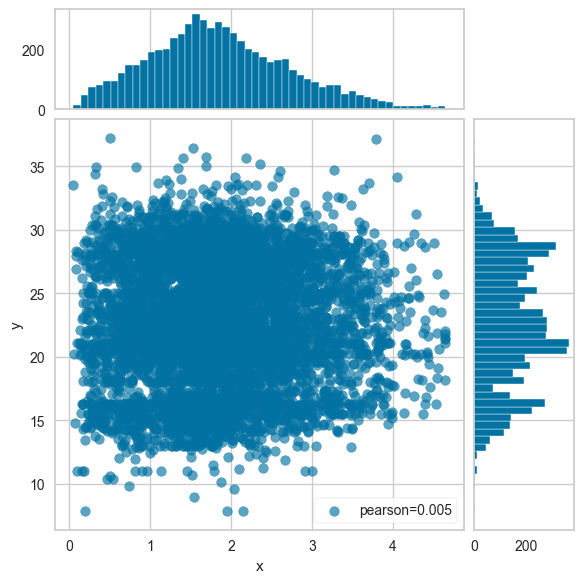

<AxesSubplot: xlabel='x', ylabel='y'>

In [183]:
from yellowbrick.features import (JointPlotVisualizer,)

fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(feature="vhm0", target="combined_cons")
jpv.fit(df["vhm0"], df["combined_cons"])
jpv.poof()

### VHM0_SW1

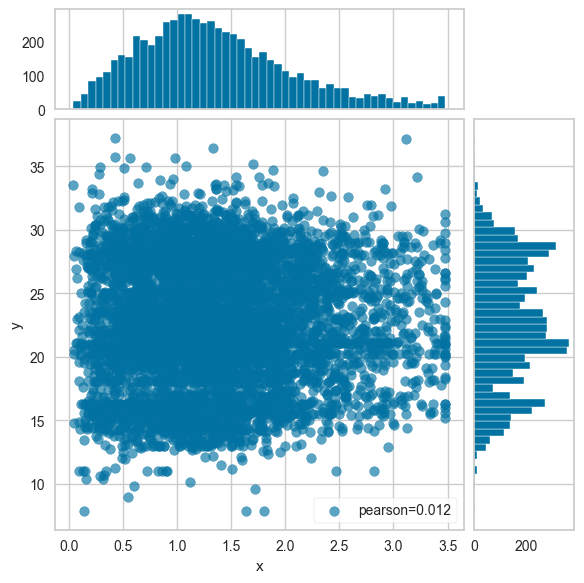

<AxesSubplot: xlabel='x', ylabel='y'>

In [184]:
fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(feature="vhm0_sw1", target="combined_cons")
jpv.fit(df["vhm0_sw1"], df["combined_cons"])
jpv.poof()

### Wind speed

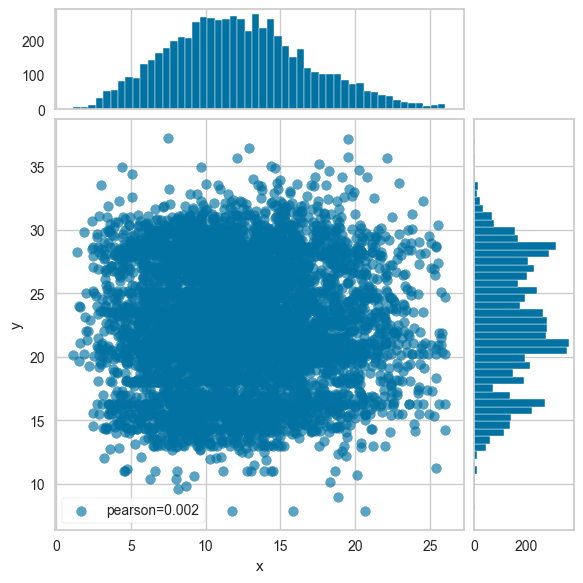

<AxesSubplot: xlabel='x', ylabel='y'>

In [185]:
fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(feature="wind_speed_kts", target="combined_cons")
jpv.fit(df["wind_speed_kts"], df["combined_cons"])
jpv.poof()

### Speed over ground

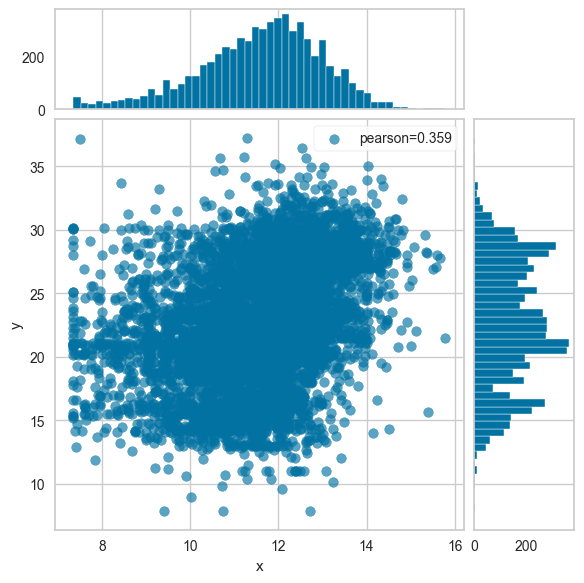

<AxesSubplot: xlabel='x', ylabel='y'>

In [186]:
fig, ax = plt.subplots(figsize=(6, 6))
jpv = JointPlotVisualizer(feature="speed_over_ground", target="combined_cons")
jpv.fit(df["speed_over_ground"], df["combined_cons"])
jpv.poof()

In [187]:
# Move combined consumption to the last
import movecolumn as mc
mc.MoveToLast(df,'combined_cons')

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,app_wind_dir_4.0,...,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0,combined_cons
0,1.0,2.829583,1.733333,18.129864,8.70,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.00
1,1.0,1.891633,1.559700,11.519384,11.98,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.00
2,1.0,1.166750,0.716500,10.346632,12.70,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.92
3,1.0,1.833333,1.213333,14.067513,11.62,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.00
4,1.0,2.519125,2.295292,13.792033,11.12,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,0.0,2.808417,2.452750,12.969203,11.44,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.55
6586,0.0,2.365556,2.284815,12.734473,11.75,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.47
6587,0.0,2.219470,2.172803,15.530505,12.00,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.76
6588,0.0,1.553167,1.516667,11.347595,11.83,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.44


In [188]:
df

,design,vhm0,vhm0_sw1,wind_speed_kts,speed_over_ground,load,app_wind_dir_1.0,app_wind_dir_2.0,app_wind_dir_3.0,app_wind_dir_4.0,...,app_swell_dir_8.0,app_wave_dir_1.0,app_wave_dir_2.0,app_wave_dir_3.0,app_wave_dir_4.0,app_wave_dir_5.0,app_wave_dir_6.0,app_wave_dir_7.0,app_wave_dir_8.0,combined_cons
0,1.0,2.829583,1.733333,18.129864,8.70,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.00
1,1.0,1.891633,1.559700,11.519384,11.98,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.00
2,1.0,1.166750,0.716500,10.346632,12.70,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,24.92
3,1.0,1.833333,1.213333,14.067513,11.62,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.00
4,1.0,2.519125,2.295292,13.792033,11.12,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,0.0,2.808417,2.452750,12.969203,11.44,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.55
6586,0.0,2.365556,2.284815,12.734473,11.75,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.47
6587,0.0,2.219470,2.172803,15.530505,12.00,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.76
6588,0.0,1.553167,1.516667,11.347595,11.83,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.44


## Splitting the dataset

In [189]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,30].values

X_train, X_test, y_train, y_test =\
 train_test_split(X, y,
 test_size=0.2,
 random_state=42)

In [190]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5084, 30)
(5084,)
(1271, 30)
(1271,)


## Bringing features onto the same scale

In [191]:
from sklearn import preprocessing

sc_X = preprocessing.RobustScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.

The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.

We only use the scaled X_train and X_test for models that are affected if not scaled, like linear regression models (linear, lasso, ridge) and svr.

# Linear Regression

In [192]:
from sklearn.linear_model import LinearRegression

regressor_LR = LinearRegression()
regressor_LR.fit(X_train_sc, y_train)
y_pred_LR = regressor_LR.predict(X_test_sc)

In [193]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_LR), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_LR)/y_pred_LR)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_LR), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_LR), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 2))

## residuals
residuals = y_test - y_pred_LR
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_LR[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6008
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1133
Mean Absolute Error (Σ|y-pred|/n): 2.49
Mean Squared Error (Σ(y-pred)^2/n): 9.71
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 3.12
Max Error: 13.97


# Decision Trees

In [194]:
from sklearn.tree import DecisionTreeRegressor

regressor_DT = DecisionTreeRegressor()
regressor_DT.fit(X_train, y_train)
y_pred_DT = regressor_DT.predict(X_test)

In [195]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_DT), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_DT)/y_pred_DT)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_DT), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_DT), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)), 2))

## residuals
residuals = y_test - y_pred_DT
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_DT[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.357
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1365
Mean Absolute Error (Σ|y-pred|/n): 2.97
Mean Squared Error (Σ(y-pred)^2/n): 15.63
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 3.95
Max Error: -14.7


# Random Forest

In [196]:
from sklearn.ensemble import RandomForestRegressor

regressor_RF = RandomForestRegressor(random_state=42, n_estimators=500)
regressor_RF.fit(X_train, y_train)
y_pred_RF = regressor_RF.predict(X_test)

In [197]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_RF), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_RF)/y_pred_RF)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_RF), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_RF), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 2))

## residuals
residuals = y_test - y_pred_RF
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_RF[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6396
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1025
Mean Absolute Error (Σ|y-pred|/n): 2.26
Mean Squared Error (Σ(y-pred)^2/n): 8.76
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 2.96
Max Error: 14.8


In [228]:
import joblib
joblib.dump(regressor_RF, "random_forest_model.joblib")
regressor_RF=joblib.load("random_forest_model.joblib")

In [229]:
regressor_RF.feature_importances_

array([0.38113501, 0.07546686, 0.06270745, 0.09465646, 0.23022725,
       0.0357987 , 0.00361474, 0.00557571, 0.00509724, 0.00782599,
       0.00882034, 0.00515448, 0.00549103, 0.00197908, 0.00199489,
       0.0059705 , 0.00530112, 0.00578166, 0.00531086, 0.00445815,
       0.00528589, 0.00177941, 0.00260735, 0.00608455, 0.00496921,
       0.00843313, 0.0058706 , 0.00469069, 0.00549895, 0.00241268])

In [231]:
result = regressor_RF.score(X_test, y_test)
result

0.6395957068952648

In [234]:
predictions = pd.DataFrame(regressor_RF.predict(X_test))
predictions

,0
0,26.951374
1,25.215928
2,22.970178
3,16.023168
4,27.537368
...,...
1266,19.931352
1267,16.171326
1268,22.125148
1269,26.316508


# Support Vector Regression

In [198]:
from sklearn.svm import SVR
regressor_SVR = SVR()
regressor_SVR.fit(X_train_sc, y_train)
y_pred_SVR = regressor_SVR.predict(X_test_sc)

In [199]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_SVR), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_SVR)/y_pred_SVR)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_SVR), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_SVR), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)), 2))

## residuals
residuals = y_test - y_pred_SVR
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_SVR[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6308
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1058
Mean Absolute Error (Σ|y-pred|/n): 2.32
Mean Squared Error (Σ(y-pred)^2/n): 8.98
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 3.0
Max Error: 15.02


# Extra Trees

In [200]:
from sklearn.ensemble import ExtraTreesRegressor
regressor_ET = ExtraTreesRegressor()
regressor_ET.fit(X_train, y_train)
y_pred_ET = regressor_ET.predict(X_test)

In [201]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_ET), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_ET)/y_pred_ET)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_ET), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_ET), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ET)), 2))

## residuals
residuals = y_test - y_pred_ET
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_ET[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6218
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1044
Mean Absolute Error (Σ|y-pred|/n): 2.3
Mean Squared Error (Σ(y-pred)^2/n): 9.19
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 3.03
Max Error: 14.72


# Lasso Regression

In [202]:
from sklearn.linear_model import Lasso

regressor_LA = Lasso()
regressor_LA.fit(X_train_sc, y_train)
y_pred_LA = regressor_LA.predict(X_test_sc)

In [203]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_LA), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_LA)/y_pred_LA)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_LA), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_LA), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LA)), 2))

## residuals
residuals = y_test - y_pred_LA
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_LA[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.2314
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1617
Mean Absolute Error (Σ|y-pred|/n): 3.63
Mean Squared Error (Σ(y-pred)^2/n): 18.69
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 4.32
Max Error: 14.3


# Ridge Regression

In [204]:
from sklearn.linear_model import Ridge

regressor_RI = Ridge(alpha=1.0)
regressor_RI.fit(X_train_sc, y_train)
y_pred_RI = regressor_RI.predict(X_test_sc)

In [205]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_RI), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_RI)/y_pred_RI)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_RI), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_RI), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RI)), 2))

## residuals
residuals = y_test - y_pred_RI
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_RI[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6008
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1133
Mean Absolute Error (Σ|y-pred|/n): 2.49
Mean Squared Error (Σ(y-pred)^2/n): 9.71
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 3.12
Max Error: 13.98


# Gaussian Process

In [206]:
from sklearn.gaussian_process import GaussianProcessRegressor

regressor_GP = GaussianProcessRegressor()
regressor_GP.fit(X_train, y_train)
y_pred_GP = regressor_GP.predict(X_test)

In [207]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_GP), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_GP)/y_pred_GP)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_GP), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_GP), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_GP)), 2))

## residuals
residuals = y_test - y_pred_GP
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_GP[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): -0.4096
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.3577
Mean Absolute Error (Σ|y-pred|/n): 4.3
Mean Squared Error (Σ(y-pred)^2/n): 34.27
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 5.85
Max Error: -27.66


# Gradient Boosting

In [208]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_GB = GradientBoostingRegressor()
regressor_GB.fit(X_train, y_train)
y_pred_GB = regressor_GB.predict(X_test)


In [209]:
from sklearn import metrics

## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred_GB), 4))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred_GB)/y_pred_GB)), 4))
print("Mean Absolute Error (Σ|y-pred|/n):", round(metrics.mean_absolute_error(y_test, y_pred_GB), 2))
print("Mean Squared Error (Σ(y-pred)^2/n):", round(metrics.mean_squared_error(y_test, y_pred_GB), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_GB)), 2))

## residuals
residuals = y_test - y_pred_GB
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred_GP[max_idx]
print("Max Error:", round(max_error, 2))

R2 (explained variance): 0.6366
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.1051
Mean Absolute Error (Σ|y-pred|/n): 2.32
Mean Squared Error (Σ(y-pred)^2/n): 8.84
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 2.97
Max Error: 14.15


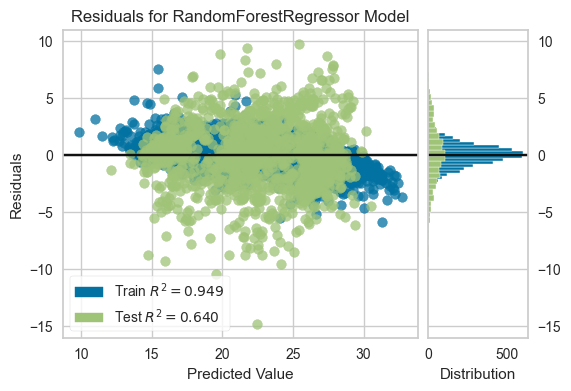

<AxesSubplot: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [210]:
# Residual plot for winning model - Random Forest
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(regressor_RF)
rpv.fit(X_train, y_train)
rpv.score(X_test, y_test)
rpv.poof()

# Metrics and Regression Evaluation

In [211]:
from prettytable import PrettyTable

metrics = PrettyTable()

metrics.field_names = ["Model", "R^2 (in %)", "MAPE (in %)", "MAE", "MSE", "RMSE"]
metrics.add_row(["Linear Regression", 60.08, 11.33, 2.49, 9.71, 3.12])
metrics.add_row(["Decision Tree Regression", 36.22, 13.65, 2.96, 15.51, 3.94])
metrics.add_row(["Random Forest Regression", 63.96, 10.25, 2.26, 8.76, 2.96])
metrics.add_row(["Support Vector Regression", 63.08, 10.58, 2.32, 8.98, 3.00])
metrics.add_row(["Extra Trees Regression", 62.77, 10.34, 2.28, 9.05, 3.01])
metrics.add_row(["Lasso Regression", 23.14, 16.17, 3.63, 18.69, 4.32])
metrics.add_row(["Ridge Regression", 60.08, 11.33, 2.49, 9.71, 3.12])
metrics.add_row(["Gaussian Process", -40.96, 35.77, 4.30, 34.27, 5.85])
metrics.add_row(["Gradient Boosting", 63.63, 10.51, 2.32, 8.84, 2.97])

In [212]:
metrics

Model,R^2 (in %),MAPE (in %),MAE,MSE,RMSE
Linear Regression,60.08,11.33,2.49,9.71,3.12
Decision Tree Regression,36.22,13.65,2.96,15.51,3.94
Random Forest Regression,63.96,10.25,2.26,8.76,2.96
Support Vector Regression,63.08,10.58,2.32,8.98,3.0
Extra Trees Regression,62.77,10.34,2.28,9.05,3.01
Lasso Regression,23.14,16.17,3.63,18.69,4.32
Ridge Regression,60.08,11.33,2.49,9.71,3.12
Gaussian Process,-40.96,35.77,4.3,34.27,5.85
Gradient Boosting,63.63,10.51,2.32,8.84,2.97
